In [132]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [133]:
# Load All Stocks Data
netflix_stock_data = pd.read_csv('../data/netflix_stock_data_cleaned.csv')
cnk_stock_data = pd.read_csv('../data/cnk_stock_data_cleaned.csv')
imax_stock_data = pd.read_csv('../data/imax_stock_data_cleaned.csv')
amc_stock_data = pd.read_csv('../data/amc_stock_data_cleaned.csv')
# Load Box Office Movies Data
movies_data = pd.read_csv('../data/movies_data_cleaned.csv')

## **Stock Trends Analysis**
> #### **Question:**
> Is there a correlation between Netflix’s adjusted close price and the stock prices of AMC, Cinemark, and IMAX?


> #### **Question:**
> For each stock, what were the highest and lowest adjusted close prices, and when did they occur?

>#### **Question:**
>How did the year-over-year (YoY) stock price changes compare between AMC, Cinemark, IMAX, and Netflix?

>#### **Question:**
>Is there a correlation between Netflix’s adjusted close price and the stock prices of AMC, Cinemark, and IMAX?

In [134]:
print("Netflix Stock Dataset : ", netflix_stock_data.describe(), "\n")
print("Box Office Dataset: ", movies_data.describe())

Netflix Stock Dataset :         adjusted_close  close_price   high_price    low_price   open_price  \
count     2661.000000  2661.000000  2661.000000  2661.000000  2661.000000   
mean       292.409917   292.409917   296.725978   287.886233   292.379733   
std        178.223110   178.223110   180.541630   175.920308   178.319066   
min         44.887142    44.887142    45.842857    42.785713    44.605713   
25%        116.239998   116.239998   117.879997   113.699997   116.209999   
50%        298.839996   298.839996   305.209991   293.279999   299.500000   
75%        424.450012   424.450012   428.850006   415.980011   424.200012   
max        691.690002   691.690002   700.989990   686.090027   692.349976   

             volume  
count  2.661000e+03  
mean   1.013579e+07  
std    9.067623e+06  
min    1.144000e+06  
25%    4.717100e+06  
50%    7.433900e+06  
75%    1.259580e+07  
max    1.333875e+08   

Box Office Dataset:                year   day_number  top10_gross_dollars     Rel

Check for events in box ticket that contains `covid`

In [135]:
covid_events = movies_data[movies_data['event'].str.contains('covid', case=False, na=False)]
print(covid_events)

      year        date       day  day_number  top10_gross_dollars      %± YD  \
2262  2020  2020-03-12  Thursday          72              5321431  +5,901.2%   
2263  2020  2020-03-13    Friday          73             17977298    +237.8%   
2264  2020  2020-03-14  Saturday          74             19710626      +9.6%   
2265  2020  2020-03-15    Sunday          75             11892439     -39.7%   
2266  2020  2020-03-16    Monday          76              3234151     -72.8%   
...    ...         ...       ...         ...                  ...        ...   
2711  2021  2021-06-10  Thursday         161              4373031        -8%   
2712  2021  2021-06-11    Friday         162             16297784    +272.7%   
2713  2021  2021-06-12  Saturday         163             12757156     -21.7%   
2714  2021  2021-06-13    Sunday         164              9336157     -26.8%   
2715  2021  2021-06-14    Monday         165              4232870     -54.7%   

          %± LW  Releases           top

In [136]:
amc_stock_data['date'] = pd.to_datetime(amc_stock_data['date'])
netflix_stock_data['date'] = pd.to_datetime(netflix_stock_data['date'])
netflix_stock_data.set_index('date', inplace=True)
amc_stock_data.set_index('date', inplace=True)

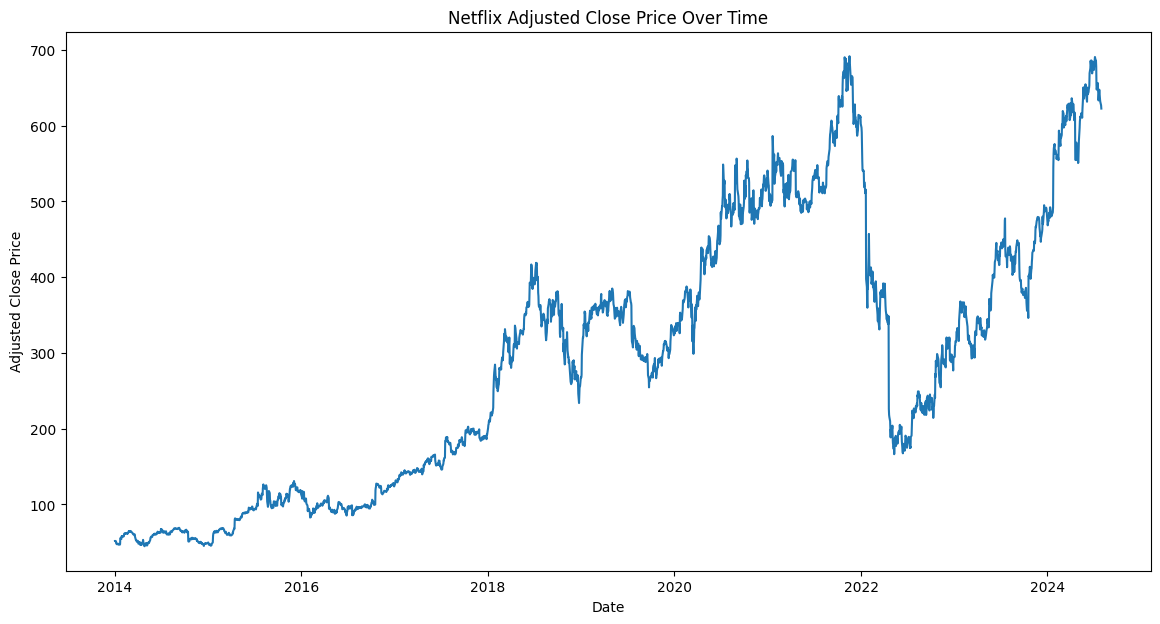

In [137]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=netflix_stock_data, x=netflix_stock_data.index, y='adjusted_close')
plt.title('Netflix Adjusted Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.show()

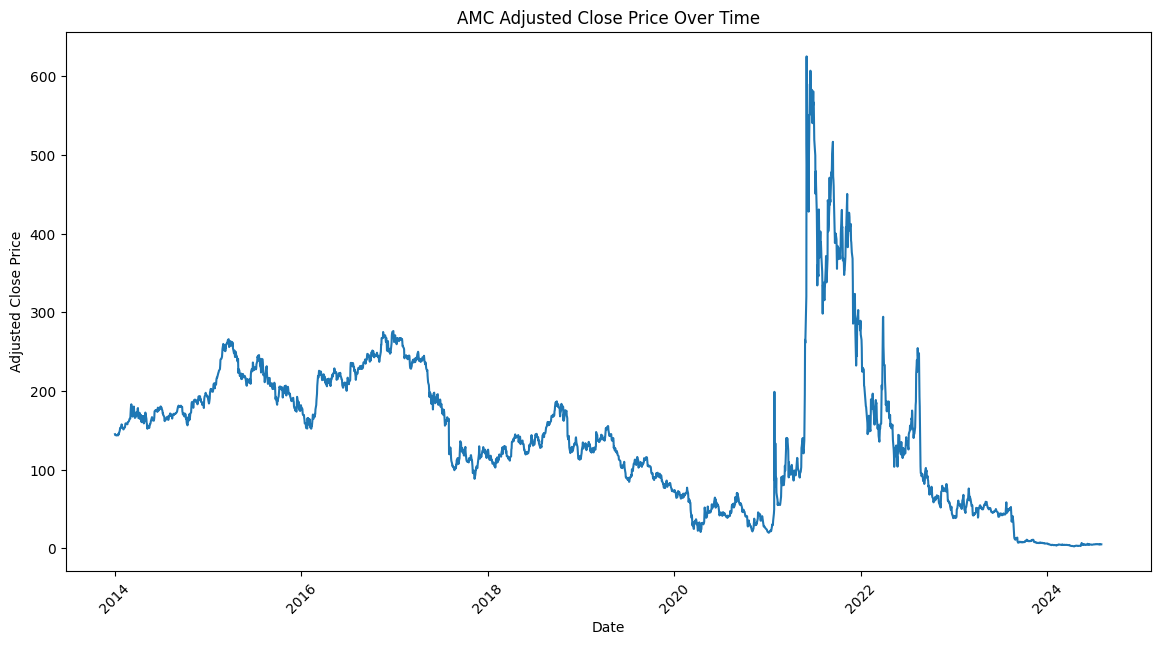

In [138]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=amc_stock_data, x=amc_stock_data.index, y='adjusted_close')
plt.title('AMC Adjusted Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.xticks(rotation=45)
plt.show()

In [139]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3951 entries, 0 to 3950
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   year                 3951 non-null   int64 
 1   date                 3951 non-null   object
 2   day                  3951 non-null   object
 3   day_number           3951 non-null   int64 
 4   top10_gross_dollars  3951 non-null   int64 
 5   %± YD                3951 non-null   object
 6   %± LW                3951 non-null   object
 7   Releases             3951 non-null   int64 
 8   top1_release         3951 non-null   object
 9   gross_dollars        3951 non-null   int64 
 10  event                708 non-null    object
dtypes: int64(5), object(6)
memory usage: 339.7+ KB


In [140]:
movies_data['date'] = pd.to_datetime(movies_data['date'])
movies_data.set_index('date', inplace=True)
print(type(movies_data.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


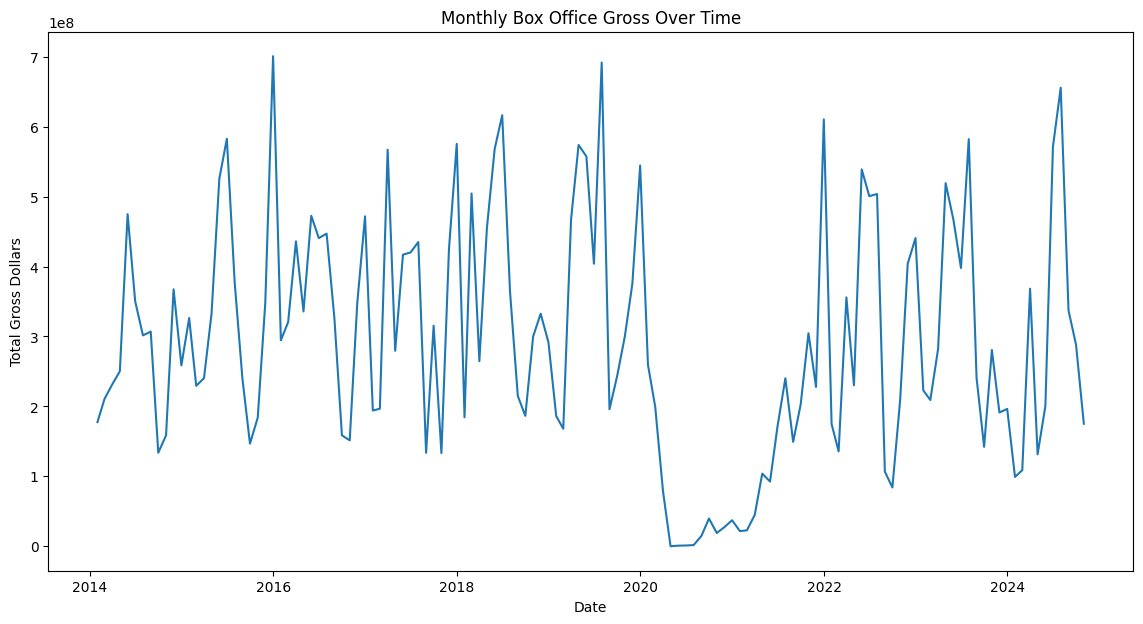

In [141]:
plt.figure(figsize=(14, 7))
monthly_box_office = movies_data['gross_dollars'].resample('ME').sum()
sns.lineplot(x=monthly_box_office.index, y=monthly_box_office)
plt.title('Monthly Box Office Gross Over Time')
plt.xlabel('Date')
plt.ylabel('Total Gross Dollars')
plt.show()